<h1>Basic EDA</h1>

In this notebook we'll perform some basic EDA over a public dataset containing the unicorn companies in the world for the past 10 years. An unicorn is a company that is worth over 1 billion dollars without being in the stock market. We'll try to see the general distribution of this companies related to location and industries.

In [1]:
#Library imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp

In [2]:
#Import data and general information
data = pd.read_csv(os.getcwd() + '/unicorn.csv')

In [3]:
data.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$125,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


For each company we have the Name, Valuation, Date when they became an unicorn, Country and City where it was founded, Industry and some of the big Investors.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1154 non-null   int64 
 1   Company           1154 non-null   object
 2   Valuation ($B)    1154 non-null   object
 3   Date Joined       1154 non-null   object
 4   Country           1154 non-null   object
 5   City              1137 non-null   object
 6   Industry          1154 non-null   object
 7   Select Investors  1153 non-null   object
dtypes: int64(1), object(7)
memory usage: 72.2+ KB


As the number of 'City' and 'Select investors' values are lower than the others, we can expect to find some Null values

In [5]:
data.isna().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                17
Industry             0
Select Investors     1
dtype: int64

As expected, we find some null values, so we choose to delete them, considering it's a very small fraction of the total data

In [6]:
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 1153
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1136 non-null   int64 
 1   Company           1136 non-null   object
 2   Valuation ($B)    1136 non-null   object
 3   Date Joined       1136 non-null   object
 4   Country           1136 non-null   object
 5   City              1136 non-null   object
 6   Industry          1136 non-null   object
 7   Select Investors  1136 non-null   object
dtypes: int64(1), object(7)
memory usage: 79.9+ KB


<h2>EDA</h2>

To perform the EDA, we'll look the distribution of the data along Industry, Location, Valuation and Dates.

<h3>Industry</h3>

In [8]:
data['Industry'].value_counts()

Fintech                                235
Internet software & services           213
E-commerce & direct-to-consumer        111
Health                                  88
Artificial intelligence                 71
Other                                   66
Cybersecurity                           58
Supply chain, logistics, & delivery     57
Data management & analytics             44
Mobile & telecommunications             37
Hardware                                37
Auto & transportation                   35
Edtech                                  30
Consumer & retail                       27
Travel                                  14
Artificial Intelligence                 12
Internet Software Services               1
Name: Industry, dtype: int64

First, we take a look at the industry categorization. We can see that some of the industries are duplicated, so we'll replace some of the outlying values (Artificial intelligence and Internet software & services)

In [9]:
data['Industry']= data['Industry'].replace('Artificial intelligence', 'Artificial Intelligence')
data['Industry']= data['Industry'].replace('Internet software & services', 'Internet Software Services')

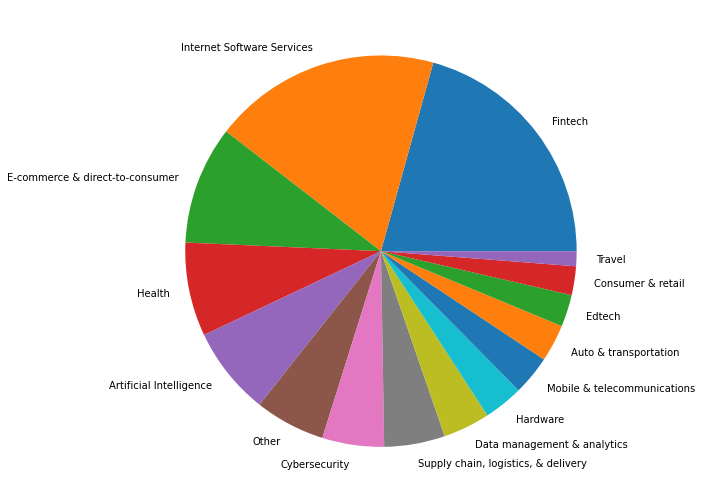

In [10]:
plt.figure(figsize = (9,9))
data['Industry'].value_counts().plot(kind = 'pie')
plt.ylabel('')
plt.show()

Plotting the values we can see that the most common Industries are Fintech, Internet Software Services and E-commerce, having almost 50% of the total. Aside from these three, most of the other Industries hold few unicorns. Considering the big gap, we could think that it's easier to create valuable companies in Fintech compared to others like Traveling, but, we also have to consider that some of this industries are new and related to current scenarios (like the pandemic or the criptocurrency market), which could be the reason to why this industries became so profitable.

<h3>Country</h3>

We need to know how many unicorns come from each country.

In [11]:
unicorns_per_country = pd.DataFrame(data['Country'].value_counts())
unicorns_per_country.reset_index(inplace = True)
unicorns_per_country.rename(columns={ "Country":"Count", "index":"Country"}, inplace = True)

In [12]:
unicorns_per_country

,Country,Count
0,United States,617
1,China,173
2,India,66
3,United Kingdom,44
4,Germany,29
5,France,23
6,Israel,22
7,Canada,19
8,Brazil,17
9,South Korea,13


We'll create a plot of the ammount of unicorns per country using the default earth map of geopandas

In [13]:
world_map = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world_map.drop(['pop_est', 'gdp_md_est'], axis = 1, inplace = True)

Since it's likely that some countries aren't spelled the same, there's a need to know which values need to be manually changed to fit the names on the geopandas map

In [14]:
world_names = world_map['name'].tolist()
data_names = data['Country'].unique().tolist()

not_same_name = []
for i in data_names:
    if i not in world_names:
        not_same_name.append(i)
        
not_same_name

['United States', 'Hong Kong', 'Seychelles', 'Bermuda', 'Czech Republic']

In [15]:
data['Country'].replace('Hong Kong', 'China', inplace = True)
unicorns_per_country = pd.DataFrame(data['Country'].value_counts())
unicorns_per_country.reset_index(inplace = True)
unicorns_per_country.rename(columns={ "Country":"Count", "index":"Country"}, inplace = True)

unicorns_per_country['Country'] = unicorns_per_country['Country'].replace('United States', 'United States of America')
unicorns_per_country['Country'] = unicorns_per_country['Country'].replace('Bermuda', 'United Kingdom')
unicorns_per_country['Country'] = unicorns_per_country['Country'].replace('Czech Republic', 'Czechia')

After fixing the names and distribution, we merge the dataframes, to include include the number of companies per country into the map dataframe

In [16]:
world_map = world_map.merge(unicorns_per_country, how = 'left', left_on = 'name', right_on = 'Country')
world_map.drop('Country', axis = 1, inplace = True)
world_map.rename(columns={ "Count":"Unicorns"}, inplace = True)

<AxesSubplot:>

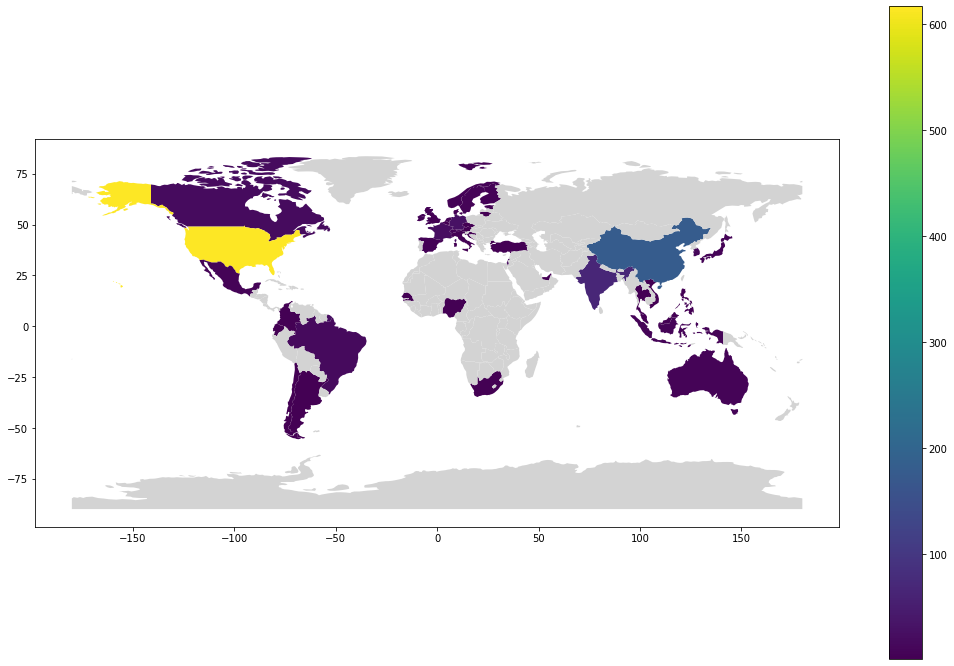

In [17]:
world_map.plot(column = 'Unicorns', figsize = (18,12), legend= True, missing_kwds= dict(color = "lightgrey",))

After plotting we can see that most unicorn companies come from the US and China, holding almost 70% of the total ammount of unicorns.

In [35]:
world_map

,continent,name,iso_a3,geometry,Unicorns
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",19.0
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",617.0
...,...,...,...,...,...
173,Europe,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
174,Europe,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
175,Europe,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
176,North America,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


In [39]:
unicorns_per_continent = pd.pivot_table(world_map, values = 'Unicorns', index = 'continent', aggfunc='sum')

In [43]:
unicorns_per_continent.index.tolist()

['Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'Seven seas (open ocean)',
 'South America']

Text(0.5, 1.0, 'Unicorns per continent')

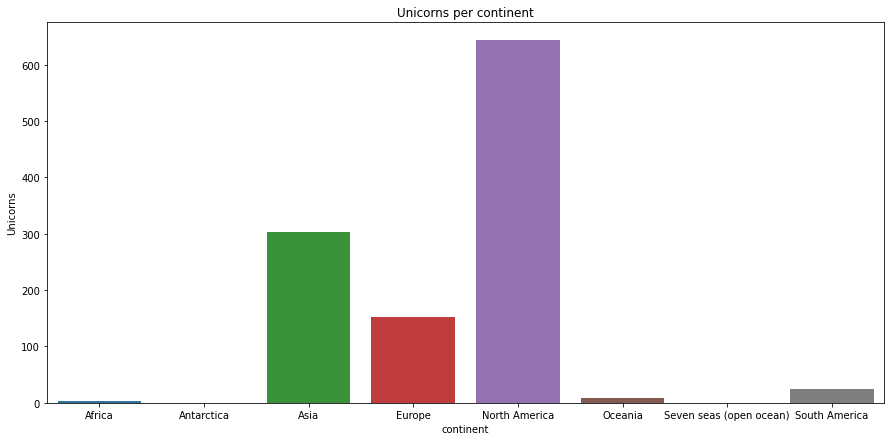

In [46]:
plt.figure(figsize = (15,7))
sns.barplot(x = unicorns_per_continent.index, y = unicorns_per_continent['Unicorns'])
plt.title('Unicorns per continent')

Looking at the continent distribution we can see how North America holds more than 50% of the unicorns, while most of the other 50% are between Asia and Europe. Very little unicorns come from South America, Oceania and Africa. This could be due to the the development and the distribution of wealth, considering Europe, Asia and North America havea bigger ammount of developed countries, where the GDP is higher and so is the investment in new companies in different industries.

<h3>Dates</h3>

In [18]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
years = list(pd.DatetimeIndex(data['Date Joined']).year)

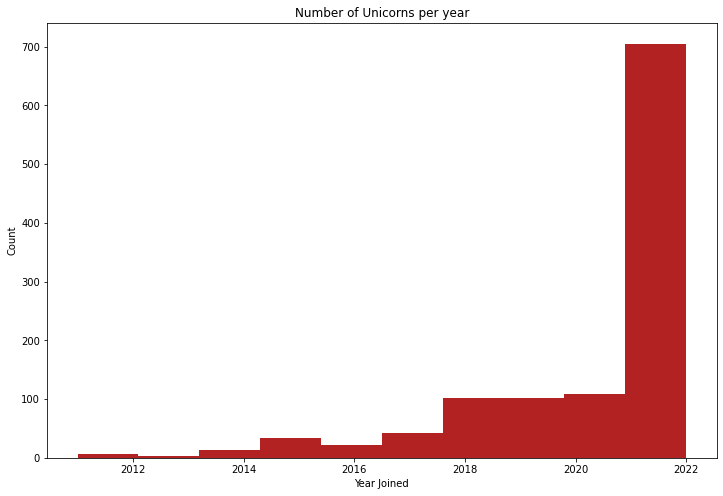

In [19]:
plt.figure(figsize = (12,8))
plt.hist(years, color = 'firebrick')
plt.xlabel('Year Joined')
plt.ylabel('Count')
plt.title('Number of Unicorns per year')
plt.show()

Most companies have joined the list of unicorns in the last two years. This could be compared with the industry field to check if there could be some correlation with modern industries in the last couple years creating unicorns.

In [55]:
last_years = [2019,2020,2021,2022]
data['year'] = pd.DatetimeIndex(data['Date Joined']).year

In [70]:
industry_per_year = pd.pivot_table(data, index = 'year', columns = 'Industry', aggfunc = 'count', values= 'City')

<AxesSubplot:title={'center':'Numer of unicorns per year'}, xlabel='Year', ylabel='Count of unicorns'>

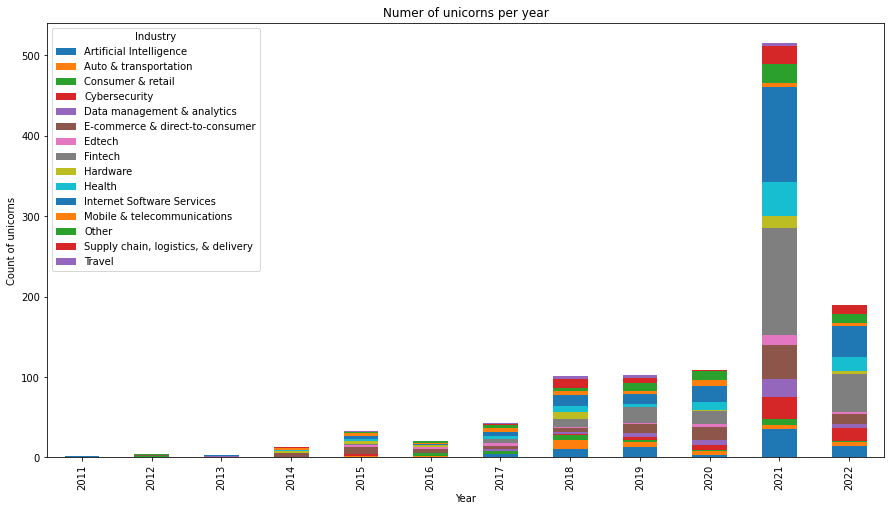

In [77]:
industry_per_year.plot(kind = 'bar', stacked = True, figsize = (15,8), xlabel = 'Year', ylabel = 'Count of unicorns', title = 'Numer of unicorns per year')

We can see that the big growth in the number of unicorns in the Fintech and Internet Software Services was mainly during 2021, just after the global pandemic, when there was a big demand of different webservices as meetings and teaching platforms, games, communication, etc. This was also the year when Bitcoin hit an all time high of 64.000 USD, which might have driven people's interest towards the Fintech industry

<h3>Valuation</h3>

To explore the valuation of the different companies we will first check the values per Industry and see the distribution this creates

In [109]:
data['Valuation ($B)'] = data['Valuation ($B)'].str.replace('$','', regex = True)
data['Valuation ($B)'] = data['Valuation ($B)'].astype('float64')

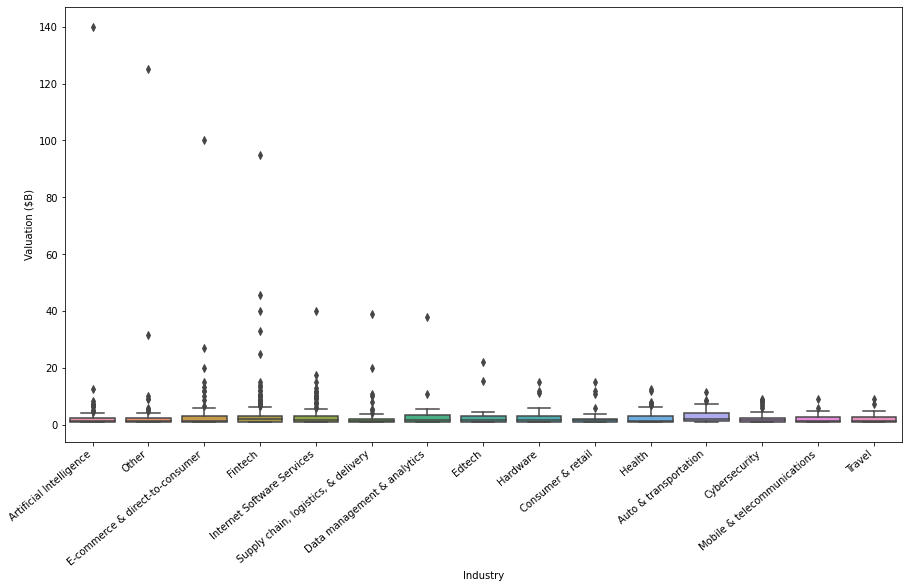

In [116]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data = data, x = 'Industry', y ='Valuation ($B)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

We can see some issues, as there are very big outliers being worth over 100 Billion dollars, while most of the medians for the boxplots are around 5 Billion

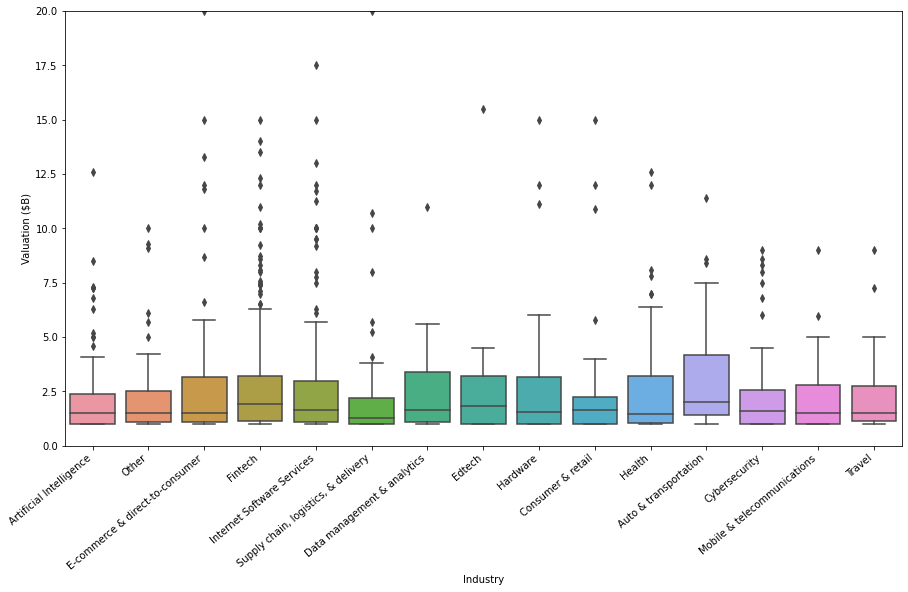

In [120]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data = data, x = 'Industry', y ='Valuation ($B)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylim(0,20)
plt.show()

This plot shows us that most of the medians are actually around the 1.5 Billion USD in each of the Industries, with more frequent outliers in Fintech, Internet Software Services and Artificial Intelligence. This only comes to show that very few unicorns manage to get past the big 1 Billion goal, and just very of them are able to get big Valuations over 20 Billion.